# Decision Tree
[tekst linku](https://www.kaggle.com/datasets/mathchi/diabetes-data-set)


In [1]:
import pandas as pd
diabetes = pd.read_csv("../content/diabetes.csv")


In [2]:
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
diabetes.Outcome.value_counts(normalize=True)

Outcome
0    0.651042
1    0.348958
Name: proportion, dtype: float64

<Axes: xlabel='Outcome', ylabel='count'>

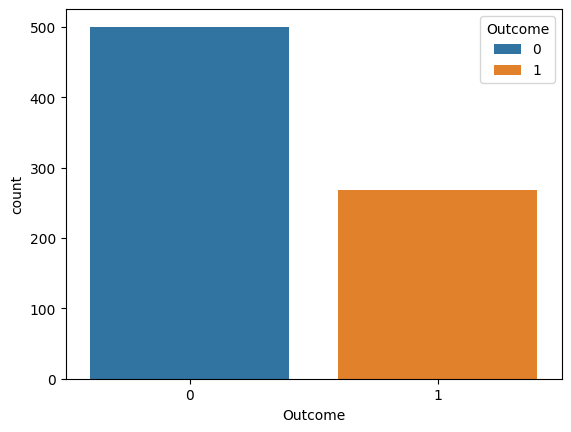

In [5]:
sns.countplot(x= "Outcome",data= diabetes, hue="Outcome")

In [6]:
X = diabetes.drop(['Outcome'], axis=1)

In [7]:
y = diabetes['Outcome']

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [9]:
y_train.value_counts(normalize=True)

Outcome
0    0.654514
1    0.345486
Name: proportion, dtype: float64

In [10]:
from sklearn.tree import DecisionTreeClassifier

In [11]:
m_01 = DecisionTreeClassifier(criterion='gini', random_state=1)
m_01.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [12]:
m_01Pred = m_01.predict(X_test)

In [13]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, m_01Pred )

array([[86, 37],
       [22, 47]])

In [14]:
from sklearn.metrics import accuracy_score
print('Accuracy Score: ',accuracy_score(y_test, m_01Pred ))

Accuracy Score:  0.6927083333333334


# Evaluate a score by cross-validation.
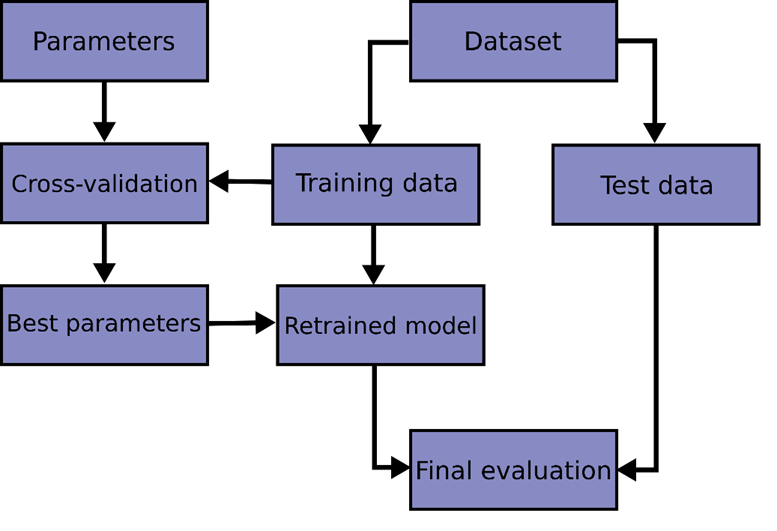

In [15]:
import numpy as np
from sklearn.model_selection import cross_val_score

In [16]:
#cv is the number of folds
score = cross_val_score(m_01, X_train, y_train, cv= 10, scoring="accuracy")
print('Scores for each fold are:', score)
print('Average score:',score.mean())

Scores for each fold are: [0.74137931 0.77586207 0.77586207 0.60344828 0.72413793 0.77586207
 0.70175439 0.70175439 0.66666667 0.75438596]
Average score: 0.7221113127646703


In [17]:
print(f'Average score: {"{:.2f}".format(score.mean())}')

Average score: 0.72


**LeaveOneOut**

In [18]:
import numpy as np
from sklearn.model_selection import LeaveOneOut
X = np.array([[1, 2, 3], [3, 4, 5], [6, 7, 8 ]])
y = np.array([1, 2, 3])
loo = LeaveOneOut()
print("Number of splits: ", loo.get_n_splits(X),"\n")

for i, (train_index, test_index) in enumerate(loo.split(X)):
    print(f"Fold {i}:")
    print(f"  Train: index={train_index}")
    print(f"  Test:  index={test_index}")

Number of splits:  3 

Fold 0:
  Train: index=[1 2]
  Test:  index=[0]
Fold 1:
  Train: index=[0 2]
  Test:  index=[1]
Fold 2:
  Train: index=[0 1]
  Test:  index=[2]


# Confusion matrix
Compute confusion matrix to evaluate the accuracy of a classification.

By definition a confusion matrix $C$ is such that $C_{i,j}$ is equal to the number of observations known to be in group $i$ and predicted to be in group $j$.

Thus in binary classification, the count of true negatives (TN) is $C_{0,0}$, false negatives (FN) is $C_{1,0}$, true positives (TP) is $C_{1,1}$ and false positives (FP) is $C_{0,1}$.

$$
\begin{array}{cc}
 & predicted\\
observed & \begin{array}{ccc}
 & 0 & 1\\
0 & TN & FP\\
1 & FN & TP
\end{array}
\end{array}
$$

In [19]:
cm=confusion_matrix(y_test, m_01Pred )
print(cm)

[[86 37]
 [22 47]]


In [20]:
tn, fp, fn, tp = cm.ravel()
(tn, fp, fn, tp)

(np.int64(86), np.int64(37), np.int64(22), np.int64(47))

## Classification_report
Build a text report showing the main classification metrics.

In [21]:
from sklearn.metrics import classification_report

print(classification_report(y_test, m_01Pred, target_names=['No(0)','Yes(1)']))

              precision    recall  f1-score   support

       No(0)       0.80      0.70      0.74       123
      Yes(1)       0.56      0.68      0.61        69

    accuracy                           0.69       192
   macro avg       0.68      0.69      0.68       192
weighted avg       0.71      0.69      0.70       192



The Macro Average - it takes the average of each metric for all the classes.
The Weighted Average - it considers the support in the calculation.
$$
weight\_avg=\dfrac{1}{total\_support}\sum_i(metric\_for\_class_i)\cdot support_i
$$

/home/leandrofdez/Escritorio/LEANDRO/4/MACHINE_LEARNING/PRACTICE/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


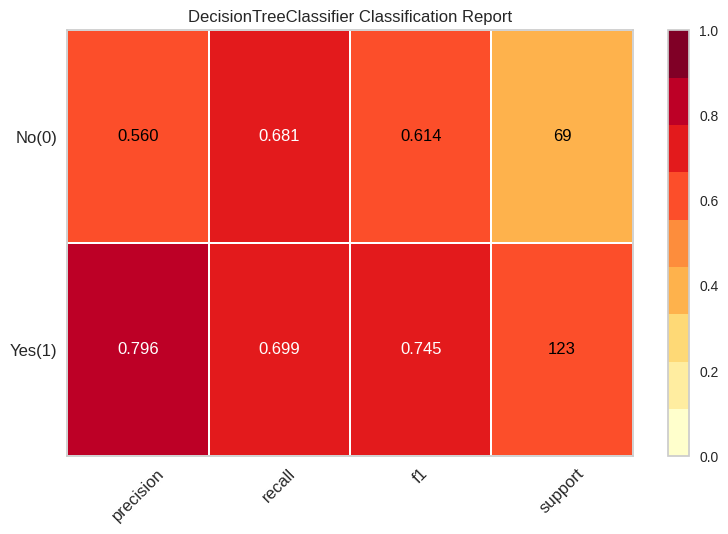

<Axes: title={'center': 'DecisionTreeClassifier Classification Report'}>

In [22]:
from yellowbrick.classifier import ClassificationReport
visualizer = ClassificationReport(m_01, classes=['Yes(1)','No(0)'], support=True)

visualizer.fit(X_train, y_train)        # Fit the visualizer and the model
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and show the figure

## cohen_kappa_score


In [23]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(y_test, m_01Pred)

np.float64(0.3630229419703104)

## ROC

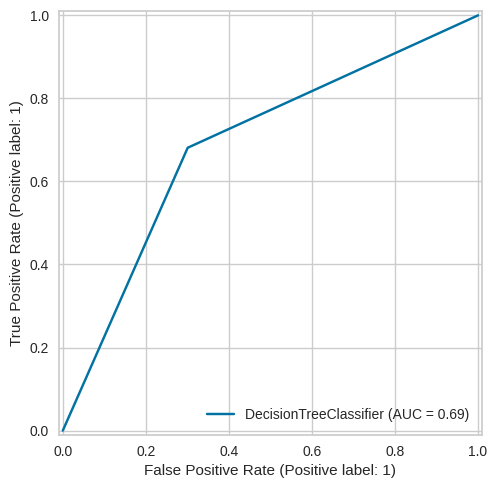

In [24]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(m_01, X_test, y_test)

In [25]:
from sklearn.metrics import det_curve
fpr, fnr, thresholds = det_curve(y_test, m_01Pred)
print(fpr)
print(fnr)
print(thresholds)

[1.         0.30081301]
[0.         0.31884058]
[0 1]


In [26]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, m_01Pred)

np.float64(0.6901732060798869)

/home/leandrofdez/Escritorio/LEANDRO/4/MACHINE_LEARNING/PRACTICE/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


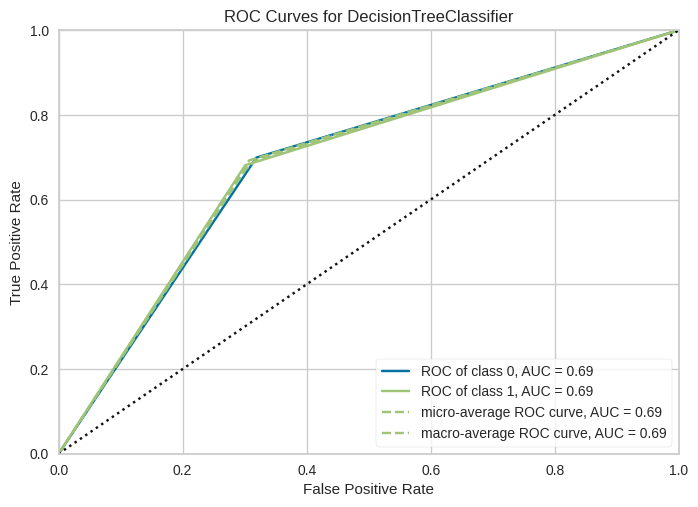

<Axes: title={'center': 'ROC Curves for DecisionTreeClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [27]:
from yellowbrick.classifier import ROCAUC
vis = ROCAUC(m_01)

vis.fit(X_train, y_train)        # Fit the training data to the visualizer
vis.score(X_test, y_test)        # Evaluate the model on the test data
vis.show()

/home/leandrofdez/Escritorio/LEANDRO/4/MACHINE_LEARNING/PRACTICE/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


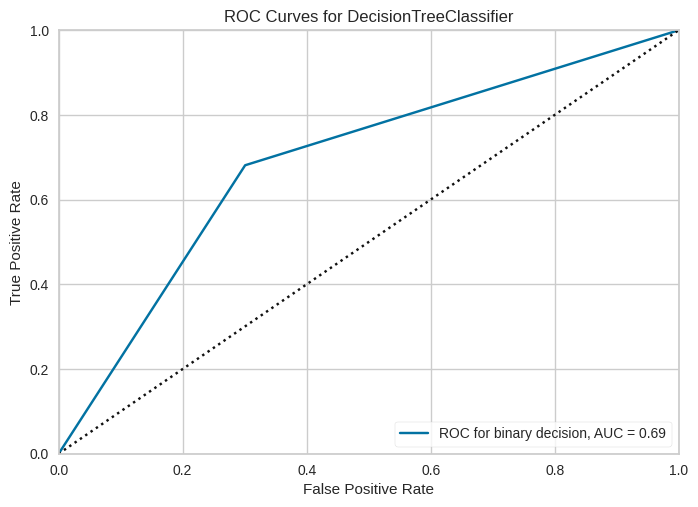

<Axes: title={'center': 'ROC Curves for DecisionTreeClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [28]:
vis = ROCAUC(m_01, binary=True)

vis.fit(X_train, y_train)        # Fit the training data to the visualizer
vis.score(X_test, y_test)        # Evaluate the model on the test data
vis.show()